In [4]:
import numpy as np
import seaborn as sns

from netclop.networkops import NetworkOps
from netclop.config_loader import load_config, update_config

In [22]:
netops = NetworkOps()
net = netops.from_positions("/Users/karsteneconomou/Dev/lpt/scallop_05.csv")
config = load_config()

mod_sizes = []
for markov_time in np.linspace(1, 3, 500):
    update_config(config, {"infomap": {"markov_time": markov_time}})
    netops._config = config
    netops.partition(net, node_info=False)
    mods = netops.group_nodes_by_module(net)
    mod_sizes.append(np.mean([len(mod) for mod in mods])) 

Binning 3564431 particle positions
Constructed network of 635 nodes and 75065 edges


<Axes: >

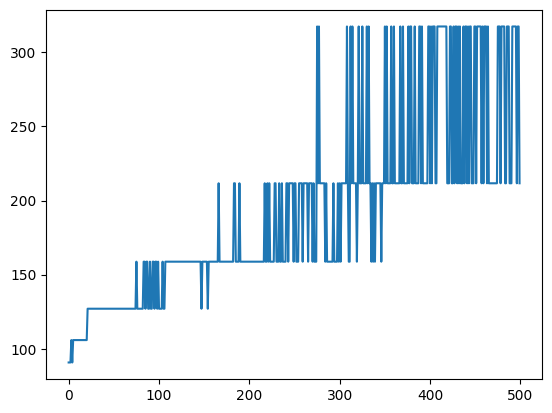

In [23]:
sns.lineplot(mod_sizes)